# Zomato Data Analysis

This notebook explores the Zomato dataset, cleaning and analyzing key aspects like ratings, votes, and cost trends.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Zomato-data-.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [2]:
# Cleaning the data

# Convert 'rate' to numerical by removing '/5' and converting to float
df['rate'] = df['rate'].replace('NEW', None)  # Replace 'NEW' values
df['rate'] = df['rate'].replace('-', None)    # Replace '-' values
df.dropna(subset=['rate'], inplace=True)      # Drop missing ratings
df['rate'] = df['rate'].str.replace('/5', '').astype(float)

# Display cleaned data info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [3]:
# Basic statistical analysis

print("Summary Statistics:")
print(df.describe())

# Count of restaurants offering online ordering
print("\nOnline Order Distribution:")
print(df['online_order'].value_counts())

# Count of restaurants with table booking
print("\nTable Booking Distribution:")
print(df['book_table'].value_counts())


Summary Statistics:
             rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000

Online Order Distribution:
online_order
No     90
Yes    58
Name: count, dtype: int64

Table Booking Distribution:
book_table
No     140
Yes      8
Name: count, dtype: int64


<ipython-input-5-65ae0e82a8ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette='coolwarm')


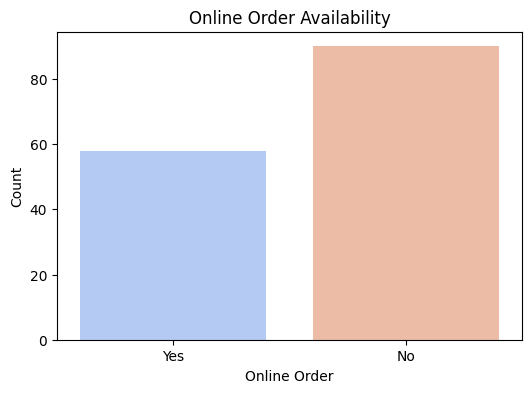

<ipython-input-5-65ae0e82a8ce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['book_table'], palette='viridis')


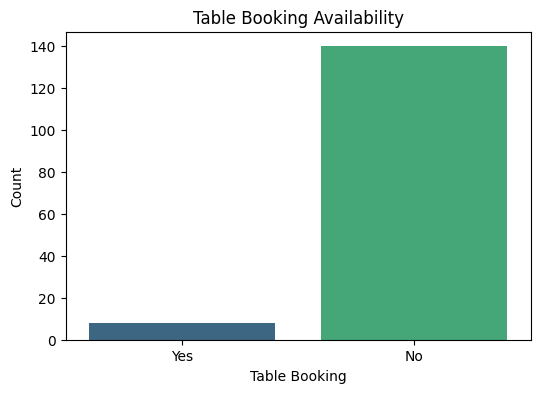

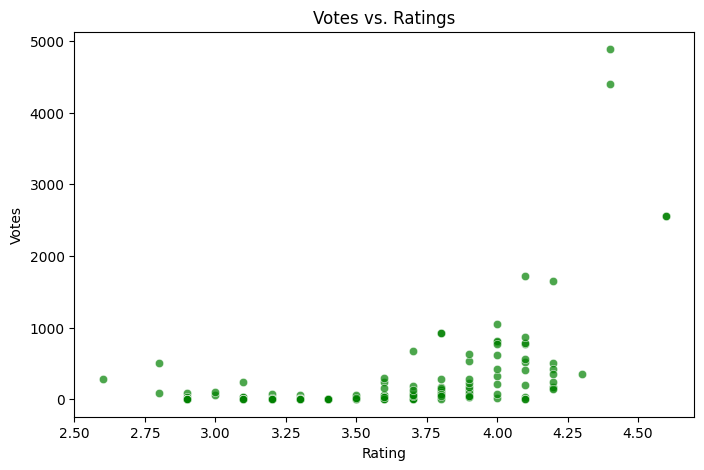

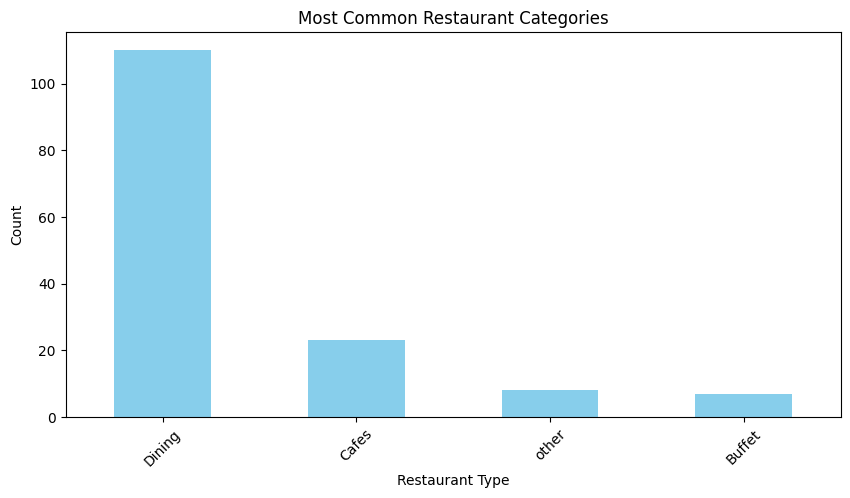

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['online_order'], palette='coolwarm')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

# Table booking availability
plt.figure(figsize=(6,4))
sns.countplot(x=df['book_table'], palette='viridis')
plt.title('Table Booking Availability')
plt.xlabel('Table Booking')
plt.ylabel('Count')
plt.show()

# Votes vs. Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['rate'], y=df['votes'], alpha=0.7, color='green')
plt.title('Votes vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

# Most common restaurant types
plt.figure(figsize=(10,5))
df['listed_in(type)'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Restaurant Categories')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
